In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle('churn_final.pickle')

In [3]:
df.head()

,taxi_id_,w_,v_total_tips_count_1,v_mean_tips_count_1,v_total_tips_count_2,v_mean_tips_count_2,v_total_tips_count_3,v_mean_tips_count_3,v_total_tips_count_4,v_mean_tips_count_4,...,v_mean_trip_total_sum_4,v_pct_cc_1,v_pct_cc_2,v_pct_cc_3,v_pct_cc_4,v_mean_dias_activo_1,v_mean_dias_activo_2,v_mean_dias_activo_3,v_mean_dias_activo_4,y
0,96.0,4,161,161.0,289.0,144.5,442.0,147.333333,596.0,149.00,...,1867.2225,0.648891,0.638204,0.620989,0.599740,7.0,7.0,7.0,7.0,0
1,96.0,5,158,158.0,319.0,159.5,447.0,149.000000,600.0,150.00,...,1841.1525,0.544212,0.601349,0.607457,0.602491,7.0,7.0,7.0,7.0,0
2,96.0,6,176,176.0,334.0,167.0,495.0,165.000000,623.0,155.75,...,1892.5800,0.548710,0.546674,0.582686,0.590803,7.0,7.0,7.0,7.0,0
3,96.0,7,151,151.0,327.0,163.5,485.0,161.666667,646.0,161.50,...,1986.9775,0.563436,0.555615,0.552136,0.578097,7.0,7.0,7.0,7.0,0
4,96.0,8,163,163.0,314.0,157.0,490.0,163.333333,648.0,162.00,...,1982.9625,0.591537,0.578262,0.567962,0.562649,7.0,7.0,7.0,7.0,0


In [4]:
var = [v for v in df.columns if v[:2]=='v_']

In [5]:
df.dropna(inplace=True)

In [6]:
df.reset_index(inplace=True,drop=True)

In [7]:
df.y.value_counts(True)

0    0.969514
1    0.030486
Name: y, dtype: float64

In [8]:
from sklearn.feature_selection import SelectKBest

In [9]:
sk = SelectKBest(k=7)

In [10]:
X = df[var]
y = df[['y']]

In [11]:
sk.fit(X,y)

/home/jose/Documentos/unam/repos/amv_2020_2/lib64/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=7, score_func=<function f_classif at 0x7fa3474ffea0>)

In [12]:
best_var = [a for a,b in zip(var,sk.get_support()) if b]

In [13]:
best_var

['v_total_trip_total_sum_3',
 'v_mean_trip_total_sum_3',
 'v_total_trip_total_sum_4',
 'v_mean_dias_activo_1',
 'v_mean_dias_activo_2',
 'v_mean_dias_activo_3',
 'v_mean_dias_activo_4']

In [14]:
best_var.remove('v_mean_trip_total_sum_3')

In [15]:
best_var.remove('v_total_trip_total_sum_3')

In [16]:
best_var

['v_total_trip_total_sum_4',
 'v_mean_dias_activo_1',
 'v_mean_dias_activo_2',
 'v_mean_dias_activo_3',
 'v_mean_dias_activo_4']

In [17]:
df[best_var].corr()

,v_total_trip_total_sum_4,v_mean_dias_activo_1,v_mean_dias_activo_2,v_mean_dias_activo_3,v_mean_dias_activo_4
v_total_trip_total_sum_4,1.000000,0.588323,0.653288,0.682996,0.695317
v_mean_dias_activo_1,0.588323,1.000000,0.912526,0.859527,0.827566
v_mean_dias_activo_2,0.653288,0.912526,1.000000,0.964921,0.932535
v_mean_dias_activo_3,0.682996,0.859527,0.964921,1.000000,0.980140
v_mean_dias_activo_4,0.695317,0.827566,0.932535,0.980140,1.000000


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score

In [19]:
modelo = LogisticRegression()

Xt,Xv,yt,yv = train_test_split(X[best_var],y,train_size=0.7)

modelo.fit(Xt,yt)

print(roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
print(roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))

print(accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
print(accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

0.9290537590592892
0.9099805767219482
0.9679272379128769
0.9743303571428571


/home/jose/Documentos/unam/repos/amv_2020_2/lib64/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
df['p'] = modelo.predict_proba(X[best_var])[:,1]

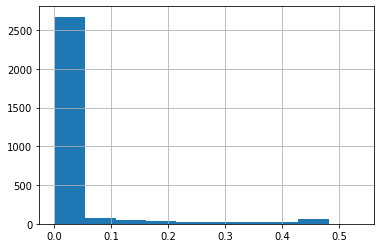

In [21]:
df['p'].hist()

In [22]:
modelo.coef_,modelo.intercept_

(array([[ 1.29105709e-04, -4.34231844e-01, -3.98942919e-01,
         -2.78471603e-01,  5.01107256e-02]]), array([0.61813889]))

In [23]:
import numpy as np

In [24]:
df['r_proba'] = pd.cut(df['p'],bins=np.arange(0,1,0.1)).astype(str)

In [25]:
df.r_proba.value_counts(True)

(0.0, 0.1]    0.914908
(0.4, 0.5]    0.029816
(0.1, 0.2]    0.028141
(0.3, 0.4]    0.013400
(0.2, 0.3]    0.013400
(0.5, 0.6]    0.000335
Name: r_proba, dtype: float64

In [26]:
df[['r_proba','y','v_mean_trip_total_sum_4']].to_excel('churn97.xlsx',index=False)

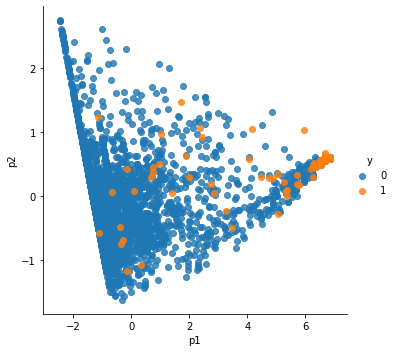

In [27]:


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xs = pd.DataFrame(sc.fit_transform(X[best_var]),columns=best_var)

pca = PCA()

pca.fit(Xs)

pca.explained_variance_ratio_.cumsum()

Xp = pd.DataFrame(pca.transform(Xs),columns=['p%d'%(i+1) for i in range(5)])

Xp['y'] = y

import seaborn as sns

sns.lmplot(data=Xp,x='p1',y='p2',hue='y',fit_reg=False)



In [28]:
Xp['r_proba'] = df['r_proba']

IndexError: invalid index to scalar variable.

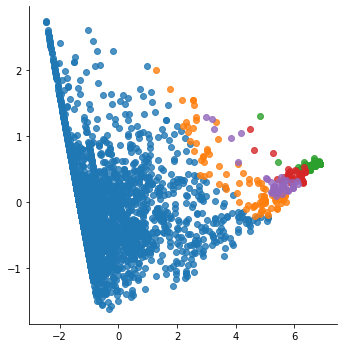

In [29]:
sns.lmplot(data=Xp,x='p1',y='p2',hue='r_proba',fit_reg=False)